# 💳 Fraud Transaction Detection  
### Machine Learning Project

---

## 👥 Group Members

- **Labiha Imran**  
  *Roll No:* F2023376347  

- **Zaib un Nisa**  
  *Roll No:* F2023376304  

- **Muhammad Faizan Haider**  
  *Roll No:* S2024332017  

- **Saliha Zulfiqar**  
  *Roll No:* F2023376293  

- **Ahmad Ghani**  
  *Roll No:* S2023376044  

---

📌 **Project Topic:**  
**Fraud Transaction Detection using Machine Learning**


# 🛡️ Fraud Detection using Classical Machine Learning

## 📌 Project Overview
This project focuses on building an end-to-end **fraud detection system** using **classical machine learning models** on a real-world tabular dataset. The objective is to automatically identify fraudulent financial transactions while minimizing false alarms and missed fraud cases.

---

## 🎯 Problem Statement
Online payment fraud is rare but costly. Due to extreme class imbalance, traditional accuracy-based models fail to capture fraudulent behavior effectively. This project aims to design a robust and interpretable ML pipeline that detects fraud using behavioral, transactional, and security-related features.

---

## 📊 Dataset Description
- **Type:** Real-world inspired tabular transaction data  
- **Size:** ~300,000 transactions  
- **Target Variable:** `is_fraud` (0 = Genuine, 1 = Fraud)  
- **Features:** Transaction amount, user behavior, location mismatch, security checks, channel, merchant category, and time-based features  

---

## 🧩 Project Workflow
The project follows a complete machine learning lifecycle:

1. **Exploratory Data Analysis (EDA)**  
   - Understanding feature distributions  
   - Identifying class imbalance  
   - Fraud vs non-fraud behavioral patterns  

2. **Data Preprocessing & Feature Engineering**  
   - Encoding categorical variables  
   - Scaling numerical features  
   - Time-based feature extraction  

3. **Baseline Model Development**  
   - Logistic Regression as a benchmark  
   - ROC-AUC as the primary evaluation metric  

4. **Model Improvements**  
   - Class weight balancing  
   - Cross-validation  
   - Hyperparameter tuning  

5. **Tree-Based Models**  
   - Decision Tree  
   - Random Forest  

6. **Model Evaluation & Comparison**  
   - ROC-AUC comparison  
   - Confusion matrix analysis  
   - ROC curve visualization (before & after improvement)  

7. **Feature Importance & Interpretability**  
   - Identifying key fraud-driving features  

8. **Threshold Optimization**  
   - Balancing fraud recall and false positives  

9. **Final Model Selection & Rollback**  
   - Saving the best model using Pickle  
   - Ensuring reproducibility and rollback capability  

---

## 📈 Evaluation Metrics
Due to severe class imbalance, the following metrics are used:
- **ROC-AUC**
- **Precision**
- **Recall**
- **F1-score**

Accuracy is intentionally avoided as a primary metric.

---

## 🏁 Final Outcome
The final selected model is a **tuned Random Forest with optimized decision threshold**, providing a strong balance between fraud detection accuracy and business usability.

---

## 🎓 Academic Objectives
✔ Use of real-world dataset  
✔ Classical ML models only  
✔ Multiple model comparisons  
✔ Proper ML pipeline implementation  
✔ Model interpretability and evaluation  
✔ Rollback mechanism using Pickle  

---

> **One-line Summary:**  
> *This notebook demonstrates a complete, production-style fraud detection pipeline using classical machine learning techniques.*


# 🔍 Fraud Detection: Model Optimization & Evaluation

This notebook focuses on **training, improving, and evaluating machine learning models** for fraud detection.

We start from a **baseline model** and progressively apply optimization techniques to improve performance, supported by visual evaluation.


## 📦 Importing Required Libraries

In this section, we import all the necessary Python libraries used for:
- Data handling and numerical computations
- Machine learning model training
- Model evaluation and visualization

These libraries support the complete modeling, optimization, and evaluation pipeline used in this notebook.


![Image name](image.jpg)

In [162]:
import  numpy as np
import pandas as pd 
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
classification_report,
roc_auc_score,
confusion_matrix  )

##  Data Ready for Modeling

At this stage:
- Data preprocessing is complete
- Features (`X`) and target (`y`) are finalized
- Train–test split is performed

We now proceed with model training.


In [69]:
X=pd.read_csv("X_features.csv")  
y=pd.read_csv( "y_target.csv")


In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

## 🚩 Baseline Model: Logistic Regression

A baseline model is trained to establish a **reference performance**.
This helps us understand whether future improvements are meaningful.


In [71]:
log_reg=LogisticRegression( max_iter=1000, random_state=42 )
log_reg.fit(X_train,y_train)

C:\Users\haide\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=42)

In [77]:
y_pred = log_reg.predict(X_test)
y_prob_base = log_reg.predict_proba(X_test)[:, 1]


In [78]:
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc_base = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     58617
           1       0.85      0.40      0.54      1322

    accuracy                           0.99     59939
   macro avg       0.92      0.70      0.77     59939
weighted avg       0.98      0.99      0.98     59939

ROC-AUC: 0.9378694671120409


In [79]:
confusion_matrix(y_test, y_pred)


array([[58522,    95],
       [  798,   524]])

In [80]:
results = {
    "Model": "Logistic Regression (Base)",
    "ROC-AUC": roc_auc
}

results


{'Model': 'Logistic Regression (Base)',
 'ROC-AUC': np.float64(0.9378694671120409)}

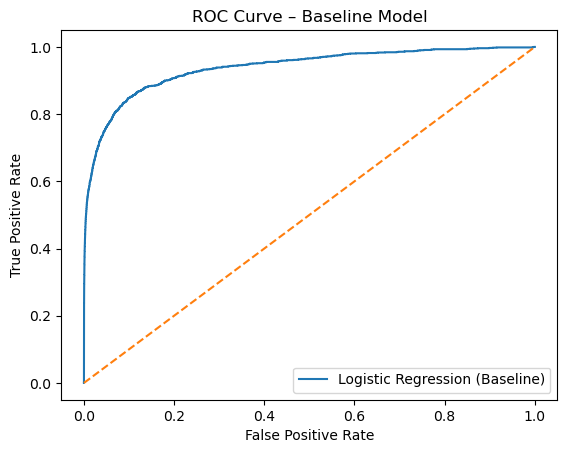

In [82]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_base)

plt.figure()
plt.plot(fpr_base, tpr_base, label="Logistic Regression (Baseline)")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Baseline Model")
plt.legend()
plt.show()


## 🔧 Improving the Baseline Model

Since fraud data is highly imbalanced, we improve the baseline by:
- Applying class weight balancing
- Enhancing sensitivity to fraud cases


In [83]:
log_reg_bal = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_reg_bal.fit(X_train, y_train)


C:\Users\haide\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [84]:
y_pred_bal = log_reg_bal.predict(X_test)
y_prob_bal = log_reg_bal.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_bal))
roc_auc_bal = roc_auc_score(y_test, y_prob_bal)
print("ROC-AUC (Balanced):", roc_auc_bal)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     58617
           1       0.15      0.85      0.26      1322

    accuracy                           0.89     59939
   macro avg       0.57      0.87      0.60     59939
weighted avg       0.98      0.89      0.93     59939

ROC-AUC (Balanced): 0.9396901014165728


In [85]:
results_list = []

results_list.append({
    "Model": "Logistic Regression (Base)",
    "ROC-AUC": roc_auc_base,
})

results_list.append({
    "Model": "Logistic Regression (Class Weight Balanced)",
    "ROC-AUC": roc_auc_bal,
})

In [86]:
results_df = pd.DataFrame(results_list)
results_df


,Model,ROC-AUC
0,Logistic Regression (Base),0.937869
1,Logistic Regression (Class Weight Balanced),0.939690


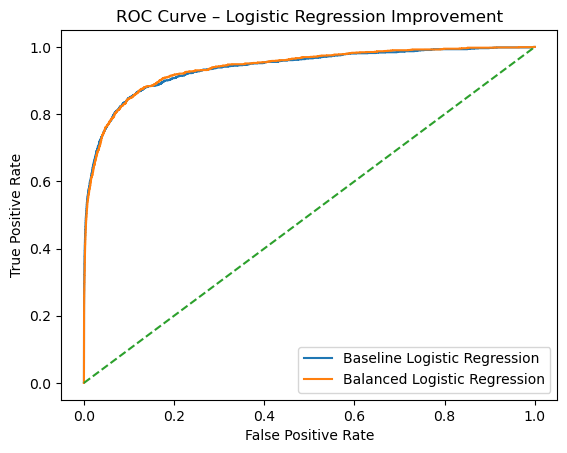

In [87]:
fpr_bal, tpr_bal, _ = roc_curve(y_test, y_prob_bal)

plt.figure()
plt.plot(fpr_base, tpr_base, label="Baseline Logistic Regression")
plt.plot(fpr_bal, tpr_bal, label="Balanced Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression Improvement")
plt.legend()
plt.show()


## Cross-Validation (Logistic Regression)

we are using stratified shuffle split because our model is imblanaced

In [91]:
log_reg_cv = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)


In [94]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)


In [95]:
# 4️ Run Cross-Validation (ROC-AUC)
cv_roc_auc = cross_val_score(
    log_reg_cv,
    X,
    y,
    cv=skf,
    scoring="roc_auc",
    n_jobs=-1
)

In [96]:
# 5️ Analyze results
print("Cross-Validation ROC-AUC scores:", cv_roc_auc)
print("Mean ROC-AUC:", cv_roc_auc.mean())
print("Std ROC-AUC:", cv_roc_auc.std())

Cross-Validation ROC-AUC scores: [0.93698662 0.93679241 0.94544748 0.93283578 0.94527935]
Mean ROC-AUC: 0.9394683286150922
Std ROC-AUC: 0.005036434011582816


In [97]:
results_list.append({
    "Model": "Logistic Regression (Balanced + CV)",
    "ROC-AUC": cv_roc_auc.mean(),
})

In [98]:
results_list

[{'Model': 'Logistic Regression (Base)',
  'ROC-AUC': np.float64(0.9378694671120409)},
 {'Model': 'Logistic Regression (Class Weight Balanced)',
  'ROC-AUC': np.float64(0.9396901014165728)},
 {'Model': 'Logistic Regression (Balanced + CV)',
  'ROC-AUC': np.float64(0.9394683286150922)}]

In [99]:
# What you’ve achieved so far

# ✔ Baseline
# ✔ First ML model
# ✔ Class imbalance handling
# ✔ Cross-validation
# ✔ Proper metric tracking

In [100]:
# We’ll do Hyperparameter Tuning the RIGHT way:

# After baseline

# After class-weight

# After cross-validation

# Using GridSearchCV

# With Stratified CV

# Optimizing ROC-AUC (not accuracy)


## Hyperparameter Tuning (Logistic Regression)

In [101]:
from sklearn.model_selection import GridSearchCV

In [108]:
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

In [109]:
# 3️ Define parameter grid (IMPORTANT)

# We tune regularization strength and penalty.

param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["liblinear"]
}

In [110]:
# 4️) Setup GridSearchCV (Stratified CV)
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [111]:
# 5️ Run hyperparameter tuning
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\haide\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc', verbose=1)

In [112]:
print("Best parameters:", grid_search.best_params_)
print("Best CV ROC-AUC:", grid_search.best_score_)

Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV ROC-AUC: 0.9393469289977421


In [113]:
best_log_reg = grid_search.best_estimator_

y_pred_tuned = best_log_reg.predict(X_test)
y_prob_tuned = best_log_reg.predict_proba(X_test)[:, 1]

roc_auc_tuned = roc_auc_score(y_test, y_prob_tuned)

print(classification_report(y_test, y_pred_tuned))
print("Test ROC-AUC:", roc_auc_tuned)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     58617
           1       0.15      0.85      0.26      1322

    accuracy                           0.89     59939
   macro avg       0.57      0.87      0.60     59939
weighted avg       0.98      0.89      0.93     59939

Test ROC-AUC: 0.9397677871818848


In [114]:
results_list.append({
    "Model": "Logistic Regression (Tuned)",
    "ROC-AUC": roc_auc_tuned
})

## 🌳 Tree-Based Models

Tree models capture **non-linear relationships** that linear models cannot.


# using second model Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
# 2️)  Train Base Decision Tree

# (No tuning yet)

dt = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced"
)

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [120]:
# 3️) Evaluatinge
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_dt)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     58617
           1       0.71      0.69      0.70      1322

    accuracy                           0.99     59939
   macro avg       0.85      0.84      0.85     59939
weighted avg       0.99      0.99      0.99     59939

ROC-AUC: 0.8402544510781894


In [121]:
results_list.append({
    "Model": "Decision Tree (Base)",
    "ROC-AUC": roc_auc_dt
})

In [122]:
# 4️ Save result
results_list.append({
    "Model": "Decision Tree (Base)",
    "ROC-AUC": roc_auc_dt
})

In [123]:
results_list

[{'Model': 'Logistic Regression (Base)',
  'ROC-AUC': np.float64(0.9378694671120409)},
 {'Model': 'Logistic Regression (Class Weight Balanced)',
  'ROC-AUC': np.float64(0.9396901014165728)},
 {'Model': 'Logistic Regression (Balanced + CV)',
  'ROC-AUC': np.float64(0.9394683286150922)},
 {'Model': 'Logistic Regression (Tuned)',
  'ROC-AUC': np.float64(0.9397677871818848)},
 {'Model': 'Logistic Regression (Tuned)',
  'ROC-AUC': np.float64(0.9397677871818848)},
 {'Model': 'Decision Tree (Base)', 'ROC-AUC': np.float64(0.8402544510781894)},
 {'Model': 'Decision Tree (Base)', 'ROC-AUC': np.float64(0.8402544510781894)}]

In [ ]:
# “Decision Trees tend to overfit, which motivates the use of ensemble methods like Random Forest 

# Random forest

In [ ]:
# “Random Forest reduces overfitting by averaging multiple decision trees trained on random subsets of data and features.”

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

rf.fit(X_train, y_train)

C:\Users\haide\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [126]:
# 7️  Evaluate
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_rf)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     58617
           1       0.94      0.61      0.74      1322

    accuracy                           0.99     59939
   macro avg       0.97      0.81      0.87     59939
weighted avg       0.99      0.99      0.99     59939

ROC-AUC: 0.9650074793841722


In [127]:
results_list.append({
    "Model": "Random Forest (Base)",
    "ROC-AUC": roc_auc_rf
})

In [128]:
results_list

[{'Model': 'Logistic Regression (Base)',
  'ROC-AUC': np.float64(0.9378694671120409)},
 {'Model': 'Logistic Regression (Class Weight Balanced)',
  'ROC-AUC': np.float64(0.9396901014165728)},
 {'Model': 'Logistic Regression (Balanced + CV)',
  'ROC-AUC': np.float64(0.9394683286150922)},
 {'Model': 'Logistic Regression (Tuned)',
  'ROC-AUC': np.float64(0.9397677871818848)},
 {'Model': 'Logistic Regression (Tuned)',
  'ROC-AUC': np.float64(0.9397677871818848)},
 {'Model': 'Decision Tree (Base)', 'ROC-AUC': np.float64(0.8402544510781894)},
 {'Model': 'Decision Tree (Base)', 'ROC-AUC': np.float64(0.8402544510781894)},
 {'Model': 'Random Forest (Base)', 'ROC-AUC': np.float64(0.9650074793841722)}]

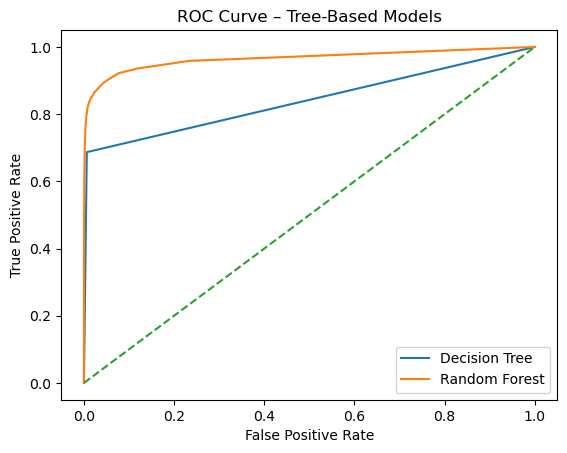

In [132]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Tree-Based Models")
plt.legend()
plt.show()


## RANDOM FOREST – HYPERPARAMETER TUNING

In [133]:
# “Random Forest performance depends heavily on tree depth, number of trees, and minimum samples, which control bias–variance tradeoff.”

In [134]:
 # ️#1 Imports
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [135]:
# ️ 2) Base Random Forest (balanced)
rf = RandomForestClassifier(
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

In [136]:
# 3️ Parameter grid (EXAM-SAFE)
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5]
}

-> max_depth → controls overfitting

-> min_samples_leaf → smooths predictions

-> n_estimators → stability vs time

In [137]:
# ️4) GridSearchCV setup
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring="roc_auc",
    cv=3,              # smaller CV because dataset is large
    n_jobs=-1,
    verbose=1
)

In [138]:
# 5️) Run tuning
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\haide\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [143]:
# 6) best parameters

print("Best RF Parameters:", grid_rf.best_params_)
print("Best CV ROC-AUC:", grid_rf.best_score_)

Best RF Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best CV ROC-AUC: 0.9735312086240774


In [144]:
# 7️⃣ Evaluate tuned RF on test set
best_rf = grid_rf.best_estimator_

y_pred_rf_tuned = best_rf.predict(X_test)
y_prob_rf_tuned = best_rf.predict_proba(X_test)[:, 1]

roc_auc_rf_tuned = roc_auc_score(y_test, y_prob_rf_tuned)

print(classification_report(y_test, y_pred_rf_tuned))
print("Test ROC-AUC:", roc_auc_rf_tuned)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     58617
           1       0.76      0.75      0.76      1322

    accuracy                           0.99     59939
   macro avg       0.88      0.87      0.88     59939
weighted avg       0.99      0.99      0.99     59939

Test ROC-AUC: 0.9739451879694845


In [145]:
results_list.append({
    "Model": "Random Forest (Tuned)",
    "ROC-AUC": roc_auc_rf_tuned
})

In [146]:
results_list

[{'Model': 'Logistic Regression (Base)',
  'ROC-AUC': np.float64(0.9378694671120409)},
 {'Model': 'Logistic Regression (Class Weight Balanced)',
  'ROC-AUC': np.float64(0.9396901014165728)},
 {'Model': 'Logistic Regression (Balanced + CV)',
  'ROC-AUC': np.float64(0.9394683286150922)},
 {'Model': 'Logistic Regression (Tuned)',
  'ROC-AUC': np.float64(0.9397677871818848)},
 {'Model': 'Logistic Regression (Tuned)',
  'ROC-AUC': np.float64(0.9397677871818848)},
 {'Model': 'Decision Tree (Base)', 'ROC-AUC': np.float64(0.8402544510781894)},
 {'Model': 'Decision Tree (Base)', 'ROC-AUC': np.float64(0.8402544510781894)},
 {'Model': 'Random Forest (Base)', 'ROC-AUC': np.float64(0.9650074793841722)},
 {'Model': 'Random Forest (Tuned)', 'ROC-AUC': np.float64(0.9739451879694845)},
 {'Model': 'Random Forest (Tuned)', 'ROC-AUC': np.float64(0.9739451879694845)}]

# FEATURE IMPORTANCE (Random Forest)

“Feature importance helps understand which variables contribute most to fraud detection, improving model interpretability and trust.”

In [147]:
importances = best_rf.feature_importances_


In [148]:
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
})


In [149]:
feature_importance_df = feature_importance_df.sort_values(
    by="Importance",
    ascending=False
)

feature_importance_df.head(10)


,Feature,Importance
8,shipping_distance_km,0.212616
0,account_age_days,0.181389
5,avs_match,0.144783
3,amount,0.127357
6,cvv_result,0.070704
7,three_ds_flag,0.058370
30,channel_web,0.041989
2,avg_amount_user,0.031614
10,day,0.020615
1,total_transactions_user,0.019609


In [150]:
feature_importance_df.to_csv("rf_feature_importance.csv", index=False)

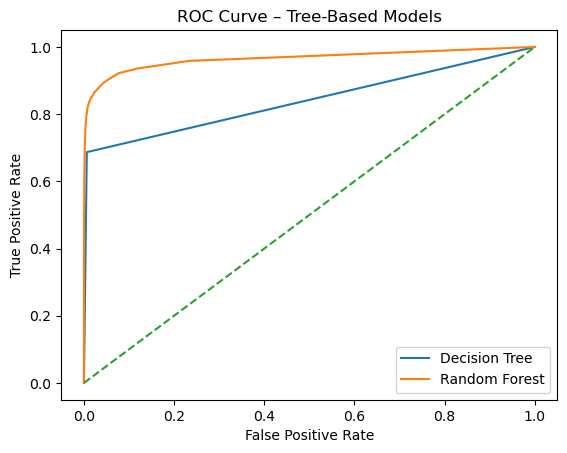

In [151]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Tree-Based Models")
plt.legend()
plt.show()


# THRESHOLD TUNING (Random Forest – Tuned)

“In fraud detection, the default 0.5 probability threshold is not optimal because missing fraud is more costly than false alarms.”

In [152]:
# 1️⃣ Get predicted probabilities

# Use  best Random Forest:

y_prob = best_rf.predict_proba(X_test)[:, 1]

In [153]:
# 2️⃣ Try multiple thresholds

# We’ll evaluate Recall, Precision, F1 at different thresholds.

import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.1, 0.9, 0.05)

threshold_results = []

for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)

    threshold_results.append({
        "Threshold": t,
        "Precision": precision_score(y_test, y_pred_thresh),
        "Recall": recall_score(y_test, y_pred_thresh),
        "F1": f1_score(y_test, y_pred_thresh)
    })

threshold_df = pd.DataFrame(threshold_results)
threshold_df

,Threshold,Precision,Recall,F1
0,0.10,0.187491,0.934191,0.312302
1,0.15,0.248662,0.913767,0.390939
2,0.20,0.310797,0.897126,0.461658
3,0.25,0.367967,0.870651,0.517303
4,0.30,0.439530,0.849470,0.579314
5,0.35,0.528696,0.822239,0.643576
6,0.40,0.616580,0.810136,0.700229
7,0.45,0.707167,0.783661,0.743452
8,0.50,0.758359,0.754917,0.756634
9,0.55,0.802365,0.718608,0.758180


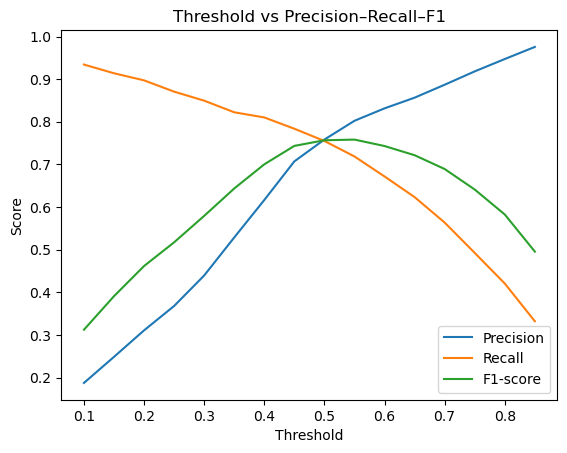

In [154]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(threshold_df["Threshold"], threshold_df["Precision"], label="Precision")
plt.plot(threshold_df["Threshold"], threshold_df["Recall"], label="Recall")
plt.plot(threshold_df["Threshold"], threshold_df["F1"], label="F1-score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold vs Precision–Recall–F1")
plt.legend()
plt.show()


In [156]:

optimal_threshold = threshold_df.loc[
    threshold_df["Recall"].idxmax(), "Threshold"
]

optimal_threshold

np.float64(0.1)

In [157]:
# this thresald is optimal for recal because we often optimize recall with acceptable precision

In [158]:
results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by="ROC-AUC", ascending=False)
results_df

,Model,ROC-AUC
9,Random Forest (Tuned),0.973945
8,Random Forest (Tuned),0.973945
7,Random Forest (Base),0.965007
3,Logistic Regression (Tuned),0.939768
4,Logistic Regression (Tuned),0.939768
1,Logistic Regression (Class Weight Balanced),0.939690
2,Logistic Regression (Balanced + CV),0.939468
0,Logistic Regression (Base),0.937869
5,Decision Tree (Base),0.840254
6,Decision Tree (Base),0.840254


In [ ]:
import pickle

with open("final_fraud_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)

In [ ]:
with open("optimal_threshold.pkl", "wb") as f:
    pickle.dump(optimal_threshold, f)

In [ ]:
with open("final_fraud_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [ ]:

with open("optimal_threshold.pkl", "rb") as f:
    loaded_threshold = pickle.load(f)

In [ ]:
y_prob_loaded = loaded_model.predict_proba(X_test)[:, 1]
y_pred_loaded = (y_prob_loaded >= loaded_threshold).astype(int)

In [ ]:
y_prob_loaded

In [ ]:
y_pred_loaded

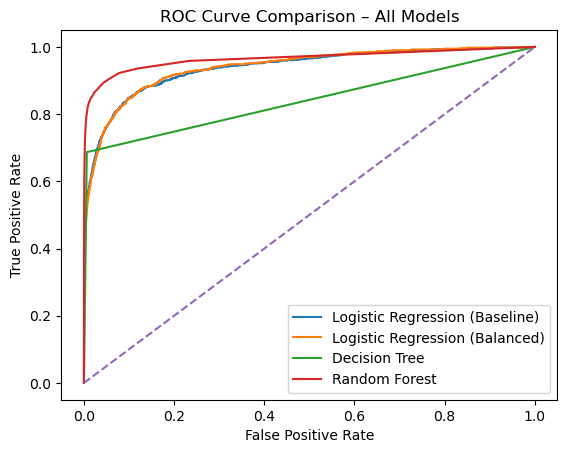

In [161]:
plt.figure()

plt.plot(fpr_base, tpr_base, label="Logistic Regression (Baseline)")
plt.plot(fpr_bal, tpr_bal, label="Logistic Regression (Balanced)")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison – All Models")
plt.legend()
plt.show()


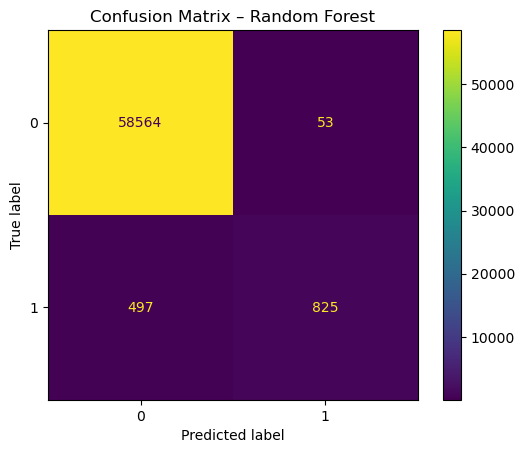

In [160]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_rf = (y_prob_rf >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix – Random Forest")
plt.show()
